# Car Price Prediction

In [43]:
!pip install scikit-learn


In [44]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

## Data Collection and Preprocessing

In [45]:
# loading the data from csv file to pandas dataframe

car_dataset = pd.read_csv('car_data.csv')

In [46]:
# inspecting the first 5 rows of the dataframe

car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [47]:
# checking the number of rows and columns

car_dataset.shape

(301, 9)

In [48]:
# getting some information about the dataset

car_dataset.info

<bound method DataFrame.info of     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1

### So we have 301 non-null values

In [49]:
# find the number of missing values

car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

### Therefore, there are no missing values in the dataset 

In [50]:
# checking the distribution of categorical data (Fuel_Type, Selling_type, Transmission)

print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Selling_type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


### Encoding the Categorical Data

In [51]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

C:\Users\madhu\AppData\Local\Temp\ipykernel_6780\3310181035.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
C:\Users\madhu\AppData\Local\Temp\ipykernel_6780\3310181035.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
C:\Users\madhu\AppData\Local\Temp\ipykernel_6780\3310181035.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a

In [52]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### Splitting the data and Target

In [53]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [54]:
print(X)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [55]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2) #10% data will be taken for testing

In [57]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of Y_train: {Y_train.shape}')
print(f'Shape of Y_test: {Y_test.shape}')

Shape of X_train: (270, 7)
Shape of X_test: (31, 7)
Shape of Y_train: (270,)
Shape of Y_test: (31,)


## Model Training

## 1. Linear Regression

In [58]:
# loading the linear regression model

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

## Model Evaluation

In [59]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [60]:
# R squared Error (Compare and see how our model is working)
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8796483009370217


## Visualize the actual prices and Predicted prices

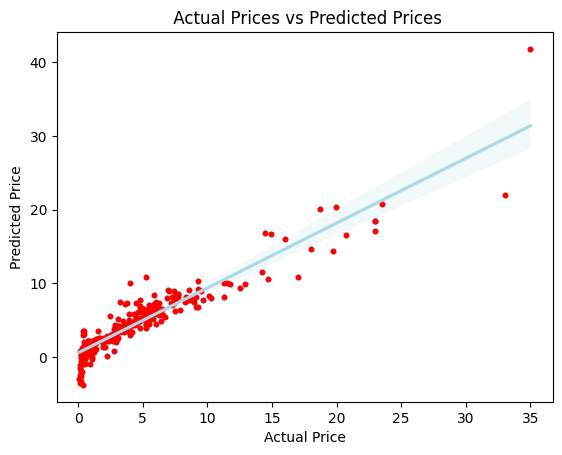

In [61]:
sns.regplot(x=Y_train, y=training_data_prediction, scatter_kws={'s':10}, line_kws={"color":"lightblue"})

plt.scatter(Y_train, training_data_prediction, color='red', s=10)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [62]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [63]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8365861023209662


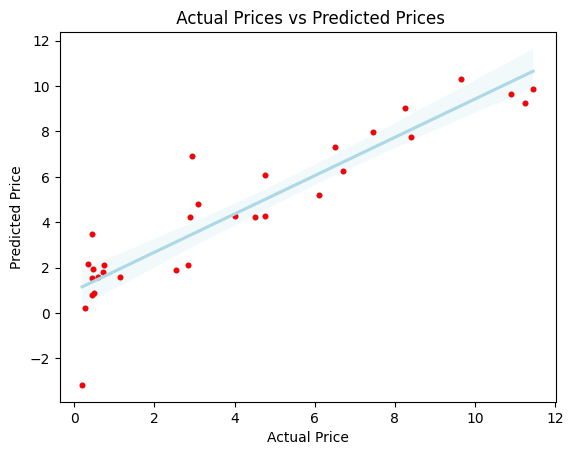

In [64]:
sns.regplot(x=Y_test, y=test_data_prediction, scatter_kws={'s':10}, line_kws={"color":"lightblue"})

plt.scatter(Y_test, test_data_prediction, color = 'red', s=10)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

## 2. Lasso Regression

In [65]:
# loading the linear regression model
lass_reg_model = Lasso()

In [66]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

## Model Evaluation

In [67]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [68]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8424480718240743


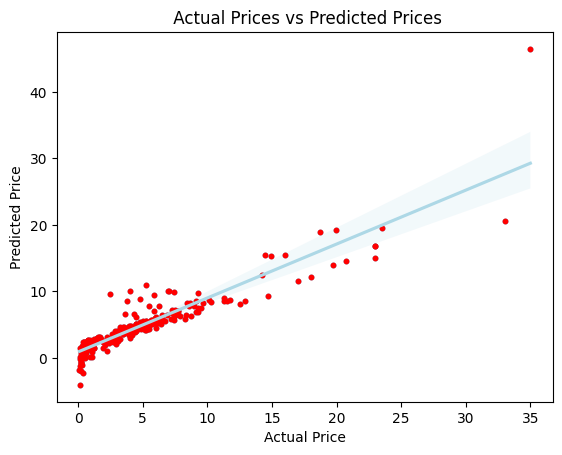

In [69]:
sns.regplot(x=Y_train, y=training_data_prediction, scatter_kws={'s':10}, line_kws={"color":"lightblue"})

plt.scatter(Y_train, training_data_prediction, color='red', s=10)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [70]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [71]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8709763132343395


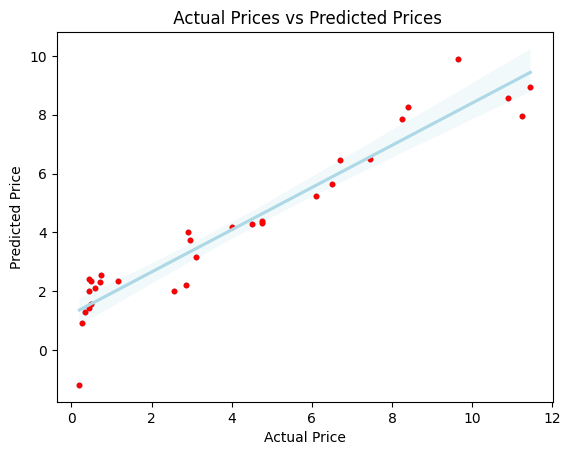

In [72]:
sns.regplot(x=Y_test, y=test_data_prediction, scatter_kws={'s':10}, line_kws={"color":"lightblue"})

plt.scatter(Y_test, test_data_prediction, color= 'red', s=10)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()